In [213]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
#from scipy.optimize import curve_fit

# Import  $\,N(E_{tr})\,$  and calculate the area unde the curve

This program import .xlsx $N(E_{tr})$ files to calclulate the area under the curve  



Trapezoidal rule
area for NE 266 nm 0S = 9296812.804727
area for NE 266 nm 1S = 13145109.260834001
area for NE 532 nm 1S = 252152.070691
area for NE 266 nm 2S = 11752271.4675595
area for NE 532 nm 2S = 7675299.751647001
Simpson's rule
area for NE 266 nm 0S = 9296906.651203252
area for NE 266 nm 1S = 13145237.869639333
area for NE 532 nm 1S = 252158.23873833334
area for NE 266 nm 2S = 11752254.62016775
area for NE 532 nm 2S = 7675337.097060249
---- MTE CALCULATION -----
,   MTE =  165.99438706610624 meV
,   MTE =  496.5074041713423 meV
,   MTE =  163.96002858751925 meV
,   MTE =  583.8900269459251 meV
,   MTE =  224.53153303742204 meV


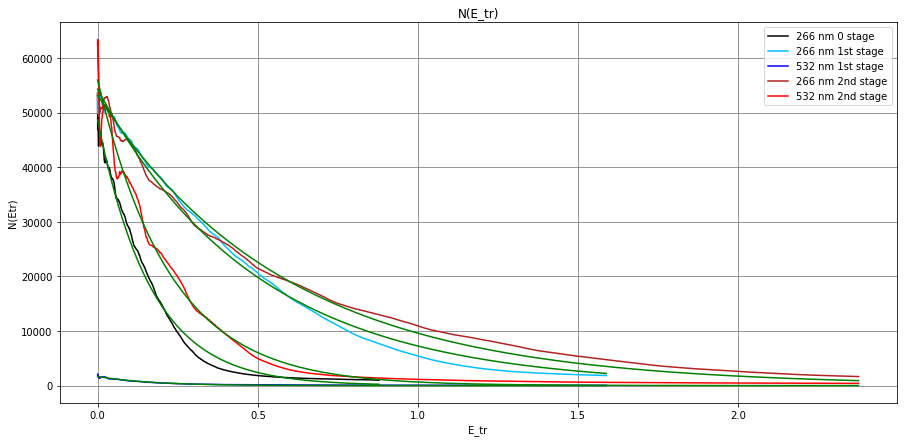

In [258]:
##########################
###    IMPORTING DATA
# N(E_tr) for 266 nm at Stage Zero
NE_266_0S = pd.read_excel('N(Etr)_Cu_Poly/N(Etr)_266_0step.xlsx', header=None)
NE_266_0S_data = NE_266_0S.iloc[1:, 0:2]
NE_266_0S_x1 = np.array(NE_266_0S_data[0].tolist())
NE_266_0S_y1 = np.array(NE_266_0S_data[1].tolist())
# N(E_tr) for 266 nm at FIRST Stage
NE_266_1S = pd.read_excel('N(Etr)_Cu_Poly/N(Etr)_266_1stage.xlsx', header=None)
NE_266_1S_data = NE_266_1S.iloc[1:, 0:2]
NE_266_1S_x1 = np.array(NE_266_1S_data[0].tolist())
NE_266_1S_y1 = np.array(NE_266_1S_data[1].tolist())
# N(E_tr) for 532 nm at FIRST Stage
NE_532_1S = pd.read_excel('N(Etr)_Cu_Poly/N(Etr)_532_1stage.xlsx', header=None)
NE_532_1S_data = NE_532_1S.iloc[1:, 0:2]
NE_532_1S_x1 = np.array(NE_532_1S_data[0].tolist())
NE_532_1S_y1 = np.array(NE_532_1S_data[1].tolist())
# N(E_tr) for 266 nm at SECOND Stage
NE_266_2S = pd.read_excel('N(Etr)_Cu_Poly/N(Etr)_266_2stage.xlsx', header=None)
NE_266_2S_data = NE_266_2S.iloc[1:, 0:2]
NE_266_2S_x1 = np.array(NE_266_2S_data[0].tolist())
NE_266_2S_y1 = np.array(NE_266_2S_data[1].tolist())
# N(E_tr) for 532 nm at SECOND Stage
NE_532_2S = pd.read_excel('N(Etr)_Cu_Poly/N(Etr)_532_2stage.xlsx', header=None)
NE_532_2S_data = NE_532_2S.iloc[1:, 0:2]
NE_532_2S_x1 = np.array(NE_532_2S_data[0].tolist())
NE_532_2S_y1 = np.array(NE_532_2S_data[1].tolist())

##########################
###    COMPUTE THE AREA
# Compute the area using the composite trapezoidal rule for 266 nm at Stage Zero
print("Trapezoidal rule")
area_NE_266_0S_T = trapz(NE_266_0S_y1, dx=1)
area_NE_266_1S_T = trapz(NE_266_1S_y1, dx=1)
area_NE_532_1S_T = trapz(NE_532_1S_y1, dx=1)
area_NE_266_2S_T = trapz(NE_266_2S_y1, dx=1)
area_NE_532_2S_T = trapz(NE_532_2S_y1, dx=1)
print("area for NE 266 nm 0S =", area_NE_266_0S_T)
print("area for NE 266 nm 1S =", area_NE_266_1S_T)
print("area for NE 532 nm 1S =", area_NE_532_1S_T)
print("area for NE 266 nm 2S =", area_NE_266_2S_T)
print("area for NE 532 nm 2S =", area_NE_532_2S_T)
# Compute the area using the composite Simpson's rule for 266 nm at Stage Zero
print("Simpson's rule")
area_NE_266_0S_S = simps(NE_266_0S_y1, dx=1)
area_NE_266_1S_S = simps(NE_266_1S_y1, dx=1)
area_NE_532_1S_S = simps(NE_532_1S_y1, dx=1)
area_NE_266_2S_S = simps(NE_266_2S_y1, dx=1)
area_NE_532_2S_S = simps(NE_532_2S_y1, dx=1)
print("area for NE 266 nm 0S =", area_NE_266_0S_S)
print("area for NE 266 nm 1S =", area_NE_266_1S_S)
print("area for NE 532 nm 1S =", area_NE_532_1S_S)
print("area for NE 266 nm 2S =", area_NE_266_2S_S)
print("area for NE 532 nm 2S =", area_NE_532_2S_S)


##########################
###    MTE CALCULATION
def fitLineLin(x, a, b):
    return a*np.exp(-x*b)
print('---- MTE CALCULATION -----')
linpopt_266_S0, linpcov_266_S0 = optimize.curve_fit(fitLineLin, NE_266_0S_x1, NE_266_0S_y1)
#print(linpopt_266_S0, '266_S0  AMPLITUDE',linpopt_266_S0[0], ',   MTE = ',(1000.0/linpopt_266_S0[1]),'meV')
print(',   MTE = ',(1000.0/linpopt_266_S0[1]),'meV')
linpopt_266_S1, linpcov_266_S1 = optimize.curve_fit(fitLineLin, NE_266_1S_x1, NE_266_1S_y1)
#print(linpopt_266_S1, '266_S1  AMPLITUDE',linpopt_266_S1[0], ',   MTE = ',(1000.0/linpopt_266_S1[1]),'meV')
print(',   MTE = ',(1000.0/linpopt_266_S1[1]),'meV')
linpopt_532_S1, linpcov_532_S1 = optimize.curve_fit(fitLineLin, NE_532_1S_x1, NE_532_1S_y1)
#print(linpopt_532_S1, '532_S1  AMPLITUDE',linpopt_532_S1[0], ',   MTE = ',(1000.0/linpopt_532_S1[1]),'meV')
print(',   MTE = ',(1000.0/linpopt_532_S1[1]),'meV')
linpopt_266_S2, linpcov_266_S2 = optimize.curve_fit(fitLineLin, NE_266_2S_x1, NE_266_2S_y1)
#print(linpopt_266_S2, '266_S2  AMPLITUDE',linpopt_266_S2[0], ',   MTE = ',(1000.0/linpopt_266_S2[1]),'meV')
print(',   MTE = ',(1000.0/linpopt_266_S2[1]),'meV')
linpopt_532_S2, linpcov_532_S2 = optimize.curve_fit(fitLineLin, NE_532_2S_x1, NE_532_2S_y1)
#print(linpopt_532_S2, '532_S2  AMPLITUDE',linpopt_532_S2[0], ',   MTE = ',(1000.0/linpopt_532_S2[1]),'meV')
print(',   MTE = ',(1000.0/linpopt_532_S2[1]),'meV')


##########################
###    PLOTING
plt.figure(1, figsize=(15,7))
plt.title("N(E_tr)")
plt.grid(color="grey")
###   DATA
plt.plot(NE_266_0S_x1, NE_266_0S_y1,label="266 nm 0 stage", color = "black")#linestyle="--",marker=".", color="black")
plt.plot(NE_266_1S_x1, NE_266_1S_y1,label="266 nm 1st stage", color = "deepskyblue")
plt.plot(NE_532_1S_x1, NE_532_1S_y1,label="532 nm 1st stage", color = "blue")
plt.plot(NE_266_2S_x1, NE_266_2S_y1,label="266 nm 2nd stage", color = "firebrick")
plt.plot(NE_532_2S_x1, NE_532_2S_y1,label="532 nm 2nd stage", color = "red")
###   FITTING
plt.plot(NE_266_0S_x1, fitLineLin(NE_266_0S_x1, *linpopt_266_S0), color = "green")
plt.plot(NE_266_1S_x1, fitLineLin(NE_266_1S_x1, *linpopt_266_S1), color = "green")
plt.plot(NE_532_1S_x1, fitLineLin(NE_532_1S_x1, *linpopt_532_S1), color = "green")
plt.plot(NE_266_2S_x1, fitLineLin(NE_266_2S_x1, *linpopt_266_S2), color = "green")
plt.plot(NE_532_2S_x1, fitLineLin(NE_532_2S_x1, *linpopt_532_S2), color = "green")
#plt.errorbar(Frec, LS, y_err, xerror, marker='x', linestyle='', label='data')
#plt.plot( 'x', 'y', data=df, marker='o', color='blue', alpha=0.3)
plt.xlabel("E_tr")
plt.ylabel("N(Etr)")
plt.legend()
plt.show()



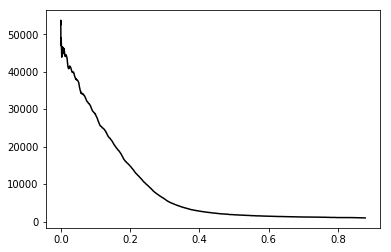

In [225]:
##########################
###    MTE CALCULATION


#from scipy import optimize

def fitLineLin(x, a, b):
    return a*np.exp(-x*b)

linpopt, linpcov = curve_fit(fitLineLin, NE_266_0S_x1, NE_266_0S_y1)

y_func = fitLineLin(NE_266_0S_x1,*linpopt)

plt.plot(NE_266_0S_x1, NE_266_0S_y1,label="266 nm 0 stage", color = "black")#linestyle="--",marker=".", color="black")
#plt.plot(NE_266_0S_x1, y_func)
#plt.plot(NE_266_0S_x1, fitLineLin(NE_266_0S_x1))
#plt.plot(NE_266_0S_x, yyfit,label="FIT", color = "red")#linestyle="--",marker=".", color="black")
#plt.plot(NE_266_0S_x1, fitLineLin(NE_266_0S_x1, *linpopt))
plt.show()
#print(linpopt) 
#print(linpcov)




266_S0   [4.86852563e+04 6.02430008e+00]
266_S1   [5.42690112e+04 2.01406866e+00]
532_S1   [1677.23071207    6.09904749]
266_S1   [5.31680777e+04 1.71265128e+00]
532_S1   [5.59527221e+04 4.45371742e+00]


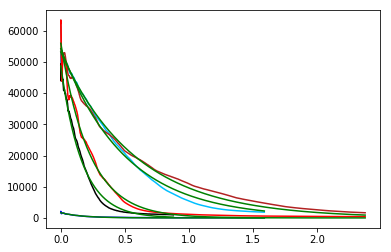

In [240]:
from scipy import optimize

def fitLineLin(x, a, b):
    return a*np.exp(-x*b)

linpopt_266_S0, linpcov_266_S0 = optimize.curve_fit(fitLineLin, NE_266_0S_x1, NE_266_0S_y1)
print('266_S0  ',linpopt_266_S0) 

linpopt_266_S1, linpcov_266_S1 = optimize.curve_fit(fitLineLin, NE_266_1S_x1, NE_266_1S_y1)
print('266_S1  ',linpopt_266_S1) 

linpopt_532_S1, linpcov_532_S1 = optimize.curve_fit(fitLineLin, NE_532_1S_x1, NE_532_1S_y1)
print('532_S1  ',linpopt_532_S1) 

linpopt_266_S2, linpcov_266_S2 = optimize.curve_fit(fitLineLin, NE_266_2S_x1, NE_266_2S_y1)
print('266_S1  ',linpopt_266_S2) 

linpopt_532_S2, linpcov_532_S2 = optimize.curve_fit(fitLineLin, NE_532_2S_x1, NE_532_2S_y1)
print('532_S1  ',linpopt_532_S2) 

plt.figure(2)
plt.plot(NE_266_0S_x1, NE_266_0S_y1,label="266 nm 0 stage", color = "black")#linestyle="--",marker=".", color="black")
plt.plot(NE_266_1S_x1, NE_266_1S_y1,label="266 nm 1st stage", color = "deepskyblue")
plt.plot(NE_532_1S_x1, NE_532_1S_y1,label="532 nm 1st stage", color = "blue")
plt.plot(NE_266_2S_x1, NE_266_2S_y1,label="266 nm 2nd stage", color = "firebrick")
plt.plot(NE_532_2S_x1, NE_532_2S_y1,label="532 nm 2nd stage", color = "red")
plt.plot(NE_266_0S_x1, fitLineLin(NE_266_0S_x1, *linpopt_266_S0), color = "green")
plt.plot(NE_266_1S_x1, fitLineLin(NE_266_1S_x1, *linpopt_266_S1), color = "green")
plt.plot(NE_532_1S_x1, fitLineLin(NE_532_1S_x1, *linpopt_532_S1), color = "green")
plt.plot(NE_266_2S_x1, fitLineLin(NE_266_2S_x1, *linpopt_266_S2), color = "green")
plt.plot(NE_532_2S_x1, fitLineLin(NE_532_2S_x1, *linpopt_532_S2), color = "green")
plt.show()

#print(linpopt) 
#print(linpcov)

In [242]:
1/6.024
linpopt_266_S0[1]

6.024300084326081

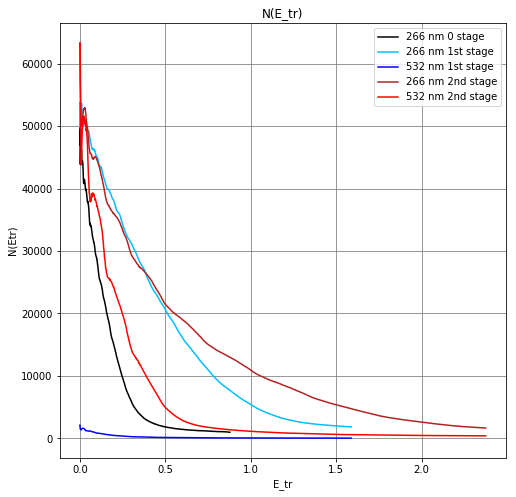

In [202]:
#############################################################################################
#########    USING CSV I HAD ISSUES WITH THE ARRAY PART 

# N(E_tr) for 266 nm at Stage Zero
NE_266_0S = pd.read_csv (r'N(Etr)_Cu_Poly/N(Etr)_266_0step.csv')  
NE_266_0S_x = pd.DataFrame(NE_266_0S, columns= ['0'])#,'52590'])
NE_266_0S_y = pd.DataFrame(NE_266_0S, columns= ['52590'])#,'52590'])

# N(E_tr) for 266 nm at FIRST Stage
NE_266_1S = pd.read_csv (r'N(Etr)_Cu_Poly/N(Etr)_266_1stage.csv')  
NE_266_1S_x = pd.DataFrame(NE_266_1S, columns= ['0'])#,'52590'])
NE_266_1S_y = pd.DataFrame(NE_266_1S, columns= ['50967'])#,'52590'])

# N(E_tr) for 532 nm at FIRST Stage
NE_532_1S = pd.read_csv (r'N(Etr)_Cu_Poly/N(Etr)_532_1stage.csv')  
NE_532_1S_x = pd.DataFrame(NE_532_1S, columns= ['0'])#,'52590'])
NE_532_1S_y = pd.DataFrame(NE_532_1S, columns= ['2032'])#,'52590'])

# N(E_tr) for 266 nm at SECOND Stage
NE_266_2S = pd.read_csv (r'N(Etr)_Cu_Poly/N(Etr)_266_2stage.csv')  
NE_266_2S_x = pd.DataFrame(NE_266_2S, columns= ['0'])#,'52590'])
NE_266_2S_y = pd.DataFrame(NE_266_2S, columns= ['63344'])#,'52590'])
# N(E_tr) for 532 nm at SECOND Stage
NE_532_2S = pd.read_csv (r'N(Etr)_Cu_Poly/N(Etr)_532_2stage.csv')  
NE_532_2S_x = pd.DataFrame(NE_532_2S, columns= ['0'])#,'52590'])
NE_532_2S_y = pd.DataFrame(NE_532_2S, columns= ['62338'])#,'52590'])


###   PLOT DATA

plt.figure(2, figsize=(8,8))
plt.title("N(E_tr)")
plt.grid(color="grey")
#plt.plot(WL, LS)
plt.plot(NE_266_0S_x, NE_266_0S_y,label="266 nm 0 stage", color = "black")#linestyle="--",marker=".", color="black")
plt.plot(NE_266_1S_x, NE_266_1S_y,label="266 nm 1st stage", color = "deepskyblue")
plt.plot(NE_532_1S_x, NE_532_1S_y,label="532 nm 1st stage", color = "blue")
plt.plot(NE_266_2S_x, NE_266_2S_y,label="266 nm 2nd stage", color = "firebrick")
plt.plot(NE_532_2S_x, NE_532_2S_y,label="532 nm 2nd stage", color = "red")
#plt.errorbar(Frec, LS, y_err, xerror, marker='x', linestyle='', label='data')
#plt.plot( 'x', 'y', data=df, marker='o', color='blue', alpha=0.3)
plt.xlabel("E_tr")
plt.ylabel("N(Etr)")
plt.legend()
plt.show()

## MISELANEOUS

THIS ARE THE SAMPLES I MADE THE ANALYSIS FROM 



In [137]:
#from __future__ import print_function

#import numpy as np
from scipy.integrate import simps
from numpy import trapz

NE = pd.read_csv (r'N(Etr).csv')  
print(NE)

#XX=np.array([NE[0:]])

NE_x = pd.DataFrame(NE, columns= ['0'])#,'52590'])
NE_y = pd.DataFrame(NE, columns= ['52590'])#,'52590'])

print(NE_x)
print(NE_y)

xxx=np.array(NE_x)#.tolist())#, dtype=np.float)
print(xxx)

#x = np.array(NE_x[0:])#, dtype=np.float)
#y = np.array(NE_y[0:])#, dtype=np.float)

#print(x)
#print("xxxxxxxxxxx")
#print(y)

#print(NE_266_0S_x)
#print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
#print(NE_266_0S_y)
wines_x = np.asarray(NE_266_0S_x[1:], dtype=np.float)
wines_y = np.asarray(NE_266_0S_y[1:], dtype=np.float)

#print(wines_x)
#print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
#print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
#print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
#print(wines_x)
#print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
#print(wines_y)

yy=np.array([52590.0,53716.0,52047.0,50711.0])
print(yy)

area = trapz(yy, dx=1)#dx=5)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, dx=1)
print("area =", area)

          0         52590
0  0.000004  53716.625000
1  0.000014  51299.082031
2  0.000032  52047.812500
3  0.000056  50711.562500
          0
0  0.000004
1  0.000014
2  0.000032
3  0.000056
          52590
0  53716.625000
1  51299.082031
2  52047.812500
3  50711.562500
[[3.527471e-06]
 [1.410989e-05]
 [3.174724e-05]
 [5.643954e-05]]
[52590. 53716. 52047. 50711.]
area = 157413.5
area = [0. 0. 0. 0.]


In [67]:
myFile = pd.read_csv('N(Etr)_266_0step.csv', sep=',')
print(myFile)
wines = np.array(myFile[1:], dtype=np.float)
print(wines)

            0         52590
0    0.000004  53716.625000
1    0.000014  51299.082031
2    0.000032  52047.812500
3    0.000056  50711.562500
4    0.000088  49692.035156
5    0.000127  48995.250000
6    0.000173  47680.500000
7    0.000226  47766.707031
8    0.000286  46927.984375
9    0.000353  47060.445312
10   0.000427  47491.320312
11   0.000508  47718.367187
12   0.000596  48449.898437
13   0.000691  48451.171875
14   0.000794  48948.964844
15   0.000903  48618.750000
16   0.001019  49062.507812
17   0.001143  48555.769531
18   0.001273  48480.656250
19   0.001411  48007.867187
20   0.001556  47277.089844
21   0.001707  46781.027344
22   0.001866  46056.980469
23   0.002032  45179.722656
24   0.002205  44819.019531
25   0.002385  44180.511719
26   0.002572  43882.894531
27   0.002766  43860.222656
28   0.002967  43983.000000
29   0.003175  44104.371094
..        ...           ...
469  0.779218   1102.658691
470  0.782538   1117.713623
471  0.785864   1128.652954
472  0.789198   1118

In [83]:

# The y values.  A numpy array is used here,
# but a python list could also be used.
xx = np.array([0,1,2,3,4])
y = np.array([0,1,2,3,4])#, 4, 18, 19, 18, 7, 4])

# Compute the area using the composite trapezoidal rule.
area = trapz(y, x=xx)#dx=5)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, x=xx)
print("area =", area)

area = 8.0
area = 8.0


In [75]:
np.trapz([1,2,3])

4.0

In [115]:
import csv

with open('N(Etr).csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

print(data)

[['0', '52590'], ['3.527471E-6', '53716.625'], ['1.410989E-5', '51299.082031'], ['3.174724E-5', '52047.8125'], ['5.643954E-5', '50711.5625']]


In [120]:
import csv

dates = []
scores = []

with open('N(Etr).csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        dates.append(row[0])
        scores.append(row[1])

print(dates)
print(scores)

area = trapz(scores, dx=1)#dx=5)
print("area =", area)

['0', '3.527471E-6', '1.410989E-5', '3.174724E-5', '5.643954E-5']
['52590', '53716.625', '51299.082031', '52047.8125', '50711.5625']


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U12') dtype('<U12') dtype('<U12')

In [119]:
import csv

def readMyFile(filename):
    dates = []
    scores = []

    with open(filename) as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        for row in csvReader:
            dates.append(row[0])
            scores.append(row[1])

    return dates, scores


dates,scores = readMyFile('N(Etr).csv')

print(dates)
print(scores)


#area = trapz(scores, dx=1)#dx=5)
#print("area =", area)

['0', '3.527471E-6', '1.410989E-5', '3.174724E-5', '5.643954E-5']
['52590', '53716.625', '51299.082031', '52047.8125', '50711.5625']


In [141]:
# N(E_tr) for 266 nm at Stage Zero
NE_266_0S = pd.read_csv (r'N(Etr)_Cu_Poly/N(Etr)_266_0step.csv')  
NE_266_0S_x = pd.DataFrame(NE_266_0S, columns= ['0'])#,'52590'])
NE_266_0S_y = pd.DataFrame(NE_266_0S, columns= ['52590'])#,'52590'])

from scipy import optimize

def fitLineLin(x, m, c):
    return c + m*x

linpopt, linpcov = optimize.curve_fit(fitLineLin, NE_266_0S_y, NE_266_0S_x)

plt.figure(1, figsize=(8,8))
plt.title("N(E_tr)")
plt.grid(color="grey")
plt.plot(NE_266_0S_x, NE_266_0S_y,label="266 nm 0 stage", color = "black")#linestyle="--",marker=".", color="black")
#plt.plot(Frec, fitLineLin(Frec, *linpopt))
plt.show()
#print(linpopt) 
#print(linpcov)

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NE = pd.read_excel("N(Etr)_266_0step.xlsx", header=None)#, sheet_name="N(Etr)_266_0step")

#print(NE)

#cu_data = df.iloc[10:, 0:2]
NE_data = NE.iloc[1:, 0:2]

#print(NE_data)


NE_x1 = np.array(NE_data[0].tolist())
NE_x1

area = trapz(NE_x1, dx=1)
print("area =", area)
#NE_y1 = np.array()

#x1 = np.array(cu_data[0])#.tolist())
#y1 = np.array(cu_data[1].tolist())

#print(x1)
#print(y1)

# Compute the area using the composite trapezoidal rule.
#area = trapz(NE_x1, dx=1)
#print("area =", area)


# Compute the area using the composite Simpson's rule.
#area = simps(y, x=xx)
#print("area =", area)


#cu_data = df.iloc[10:, 0:2]
#print(cu_data[0])

#x1 = np.array(cu_data[0])#.tolist())
#y1 = np.array(cu_data[1].tolist())

#print(x1)
#print(y1)


#zn_data = df.iloc[10:, 3:5]
#ni_data = df.iloc[10:, 6:8]
#fe_data = df.iloc[10:, 9:11]
#unknown_data = df.iloc[10:, 12:14]

#data_out = pd.concat([zn_data,ni_data,fe_data,unknown_data], axis=1)
#data_out.columns=['zn_x', 'zn_y','ni_x', 'ni_y', 'fe_x', 'fe_y', 'un_x', 'un_y']

#data_out

area = 146.09817801092098


In [175]:

NE = pd.read_excel('N(Etr)_Cu_Poly/N(Etr)_266_0step.xlsx', header=None)#, sheet_name="N(Etr)_266_0step")
NE

,0,1
0,N(Etr)_266_0step,NaN
1,0,52590.000000
2,3.52747e-06,53716.625000
3,1.41099e-05,51299.082031
4,3.17472e-05,52047.812500
5,5.64395e-05,50711.562500
6,8.81868e-05,49692.035156
7,0.000127,48995.250000
8,0.000173,47680.500000
9,0.000226,47766.707031
